'''
 *--------------------------------------------------------------------------
 *--------------------------------------------------------------------------
 *
 * Copyright (C) 2017 Kareem Abdelfatah - krabea@email.sc.edu
 *
 * The main applications of the StackedGP framework are to integrate different datasets through model composition, 
 * enhance predictions of quantities of interest through a cascade of intermediate predictions, and
 * to propagate uncertainties through emulated dynamical systems driven by uncertain forcing variables. 
 * By using analytical first and second-order moments of a Gaussian process as presented in the 
 * following paper:
 * 
 * Kareem Abdelfatah, Junshu Bao, Gabriel Terejanu (2017). 
 Environmental Modeling Framework using Stacked Gaussian Processes. arXiv:1612.02897v2 . 18 Jun 2017
 * 
 * This program is free software; you can redistribute it and/or modify
 * it under the terms of the GNU General Public License as published by
 * the Free Software Foundation; either version 2 of the License, or
 * (at your option) any later version.
 *
 * This program is distributed in the hope that it will be useful,
 * but WITHOUT ANY WARRANTY; without even the implied warranty of
 * MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 * GNU General Public License for more details.
 *
 * You should have received a copy of the GNU General Public License along
 * with this program; if not, write to the author.
 *
 *--------------------------------------------------------------------------
 *
 * toy_stacked_gp_2d_example_3.ipynb
 * 
 *--------------------------------------------------------------------------
 *---

In [1]:
%matplotlib inline 

import sys
sys.path.append('../')
sys.path.append('../../stackedgp_src')
import numpy as np
from __future__ import division
from mpl_toolkits.mplot3d import axes3d
import GPy, sys, matplotlib
import matplotlib.pyplot as plt
from stackedGPNetwork import StackedGPNetwork
from toyUtil import ToyUtil
from sklearn.preprocessing import StandardScaler

In [2]:
def normalize(inputdata):
        scaler = StandardScaler()
        norminput = scaler.fit_transform(inputdata)
        return norminput,scaler
    
def generateX(nsamples, start=-9, end=9):
    x = np.random.uniform(start,end,(nsamples,1))
    return x

def getT(x, xid):
    if xid == 1:
        return (x)**2
    else:
        return (x)**2

def getA(t1, t2):
#     return np.exp(np.sin(np.sqrt(t1+t2)))
    return np.sqrt(t1+t2)+3*np.cos(np.sqrt(t1+t2))+5
#     return np.cos(np.sqrt(t1+t2))

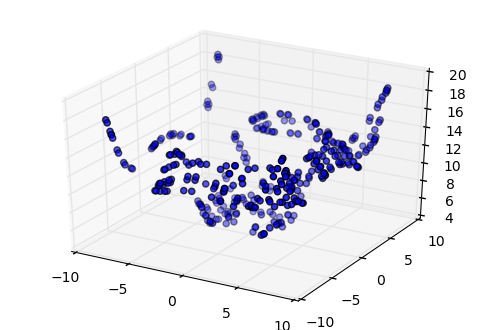

In [10]:
#generate X,T,A for training
ntraining = 20
x1_train = generateX(ntraining)
x2_train = generateX(ntraining)
ntraining = len(x1_train)
t1_train = getT(x1_train, 1).reshape(-1,1)
t2_train = getT(x2_train, 2).reshape(-1,1)

# X, Y, Z = axes3d.get_test_data(0.05)
t1_r_train = np.repeat(t1_train, ntraining, axis=1)
t2_r_train = np.repeat(t2_train, ntraining, axis=1).T

x1_r_train = np.repeat(x1_train, ntraining, axis=1)
x2_r_train = np.repeat(x2_train, ntraining, axis=1).T

a_train = getA(t1_r_train, t2_r_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[:,0:1],x[:,1:2], a_train)
ax.scatter(x1_r_train,x2_r_train, a_train)
plt.show()

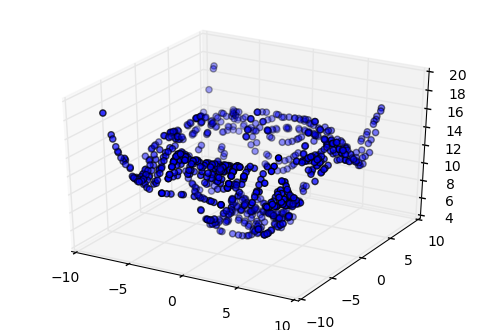

In [48]:
#generate X,T,A for training
# ntesting = 20
ntesting = 30
x1_test = generateX(ntesting)
x2_test = generateX(ntesting)
ntesting = len(x1_test)

t1_test = getT(x1_test, 1).reshape(-1,1)
t2_test = getT(x2_test, 2).reshape(-1,1)

t1_r_test = np.repeat(t1_test, ntesting, axis=1)
t2_r_test = np.repeat(t2_test, ntesting, axis=1).T

x1_r_test = np.repeat(x1_test, ntesting, axis=1)
x2_r_test = np.repeat(x2_test, ntesting, axis=1).T

a_test = getA(t1_r_test, t2_r_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_r_test,x2_r_test, a_test)
plt.show()

In [49]:
# v = a_train.shape
a_train_norm,a_train_sc = normalize(a_train.reshape(-1,1))

x1_train_norm,x1_train_sc = normalize(x1_train)
x2_train_norm,x2_train_sc = normalize(x2_train)
t1_train_norm,t1_train_sc = normalize(t1_train)
t2_train_norm,t2_train_sc = normalize(t2_train)

t1_r_train_norm = np.repeat(t1_train_norm, ntraining, axis=1)
t2_r_train_norm = np.repeat(t2_train_norm, ntraining, axis=1).T
layer2GPinput = np.hstack((t1_r_train_norm.reshape(-1,1),t2_r_train_norm.reshape(-1,1)))

stackedNetwork = StackedGPNetwork(2)
stackedNetwork.createNewNode(1,layer2GPinput,a_train_norm.reshape(-1,1), normalize=True, useGPU=False)
stackedNetwork.createNewNode(0,x1_train_norm,t1_train_norm, normalize=True, useGPU=False)
stackedNetwork.createNewNode(0,x2_train_norm,t2_train_norm, normalize=True, useGPU=False)

In [50]:
stackedNetwork.optimize(numoptimizationtrails=5)

Optimization restart 1/5, f = -112.240077067
Optimization restart 2/5, f = -112.226283684
Optimization restart 3/5, f = -112.224993572
Optimization restart 4/5, f = -112.247586207
Optimization restart 5/5, f = -112.243051293
Optimization restart 1/5, f = -112.141522027
Optimization restart 2/5, f = -112.165199298
Optimization restart 3/5, f = -111.527184874
Optimization restart 4/5, f = -112.062711961


 /usr/local/lib/python2.7/dist-packages/GPy/kern/src/stationary.py:151: RuntimeWarning:overflow encountered in divide
 /usr/local/lib/python2.7/dist-packages/GPy/kern/src/rbf.py:34: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python2.7/dist-packages/GPy/kern/src/rbf.py:37: RuntimeWarning:invalid value encountered in multiply


Optimization restart 5/5, f = -112.124752456
Optimization restart 1/5, f = -1467.86644686
Optimization restart 2/5, f = -1467.8664466
Optimization restart 3/5, f = -1467.8664469
Optimization restart 4/5, f = -1467.86644684
Optimization restart 5/5, f = -1467.86644679


Testing Analytical approach on training samples....
anlyt_train_RMS =  0.0247336137552


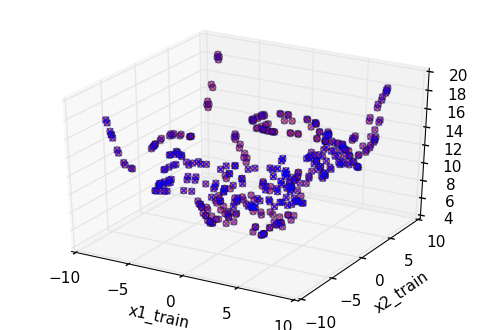

In [54]:
print 'Testing Analytical approach on training samples....'
x1_r_train_norm = np.repeat(x1_train_norm, ntraining, axis=1)
x2_r_train_norm = np.repeat(x2_train_norm, ntraining, axis=1).T

traininginput = np.concatenate((x1_r_train_norm.reshape(-1,1), x2_r_train_norm.reshape(-1,1)), axis=1)
# traininginput = linputsc.transform(traininginput)

anlyt_mean_train, var = stackedNetwork.predict(traininginput, covoption=2, jitter=1e-6)
anlyt_mean_train = anlyt_mean_train[-1]
var = var[-1]

anlyt_mean_train2 = a_train_sc.inverse_transform(anlyt_mean_train.reshape(-1,1)).reshape(-1,ntraining)

anlyt_train_err, anlyt_train_rms = ToyUtil.getRMS(a_train, anlyt_mean_train2)
print 'anlyt_train_RMS = ', anlyt_train_rms

ToyUtil.plottingScatter3D(x1_r_train,'x1_train',x2_r_train,'x2_train', a_train,'Actual_Data_train', anlyt_mean_train2,
                       'Predicting_Analytical_mean', savefname='syn_train_3.eps')

Testing Analytical approach on testing samples....


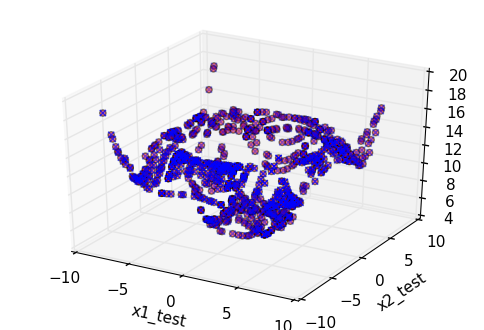

anlyt_test_RMS2 =  0.0395812597272
AvgRatio =  0.00132096053954


In [53]:
print 'Testing Analytical approach on testing samples....'

x1_test_norm =x1_train_sc.transform(x1_test)
x2_test_norm = x2_train_sc.transform(x2_test)

x1_r_test_norm = np.repeat(x1_test_norm, ntesting, axis=1)
x2_r_test_norm = np.repeat(x2_test_norm, ntesting, axis=1).T

testinginput = np.concatenate((x1_r_test_norm.reshape(-1,1), x2_r_test_norm.reshape(-1,1)), axis=1)

anlyt_mean_test, var_test = stackedNetwork.predict(testinginput, covoption=2, jitter=1e-6)
anlyt_mean_test = anlyt_mean_test[-1]
var_test = var_test[-1]

anlyt_mean_test2 = a_train_sc.inverse_transform(anlyt_mean_test.reshape(-1,1)).reshape(-1,ntesting)

var_test2 = a_train_sc.inverse_transform(var_test.reshape(-1,1)).reshape(-1,ntesting)

anlyt_test_err2, anlyt_test_rms2 = ToyUtil.getRMS(a_test, anlyt_mean_test2)

ToyUtil.plottingScatter3D(x1_r_test,'x1_test',x2_r_test,'x2_test', a_test,'Actual_Data_test', anlyt_mean_test2,
                       'Predicting_Analytical_mean', savefname='syn_test_3.eps')
print 'anlyt_test_RMS2 = ', anlyt_test_rms2
print 'AvgRatio = ', np.array(abs(a_test-anlyt_mean_test2)/np.sqrt(var_test2).reshape(a_test.shape)).mean()


In [ ]:
2